In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

## EDA

In [2]:
#Reading the csv file
absent = pd.read_csv('Absenteeism_at_work_Project.csv')

In [3]:
#Check the shape
absent.shape

(740, 21)

In [4]:
absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
#Remove the trailing spaces if any from the columns names
absent.columns = list(map(lambda x: x.strip(" "), absent.columns))


In [6]:
#Check the columns
absent.columns
#The column name "Work load average/day" has been stripped 

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [7]:
#Assign a variable to the target cloumn
target = "Absenteeism time in hours"

In [8]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"2,39,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"2,39,554",...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"2,39,554",...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"2,39,554",...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"2,39,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


## Missing Value Analysis

In [9]:
absent.isna().sum()*100/(absent.shape[0])

ID                                 0.000000
Reason for absence                 0.405405
Month of absence                   0.135135
Day of the week                    0.000000
Seasons                            0.000000
Transportation expense             0.945946
Distance from Residence to Work    0.405405
Service time                       0.405405
Age                                0.405405
Work load Average/day              1.351351
Hit target                         0.810811
Disciplinary failure               0.810811
Education                          1.351351
Son                                0.810811
Social drinker                     0.405405
Social smoker                      0.540541
Pet                                0.270270
Weight                             0.135135
Height                             1.891892
Body mass index                    4.189189
Absenteeism time in hours          2.972973
dtype: float64

In [10]:
missing_values = pd.DataFrame({"Features":absent.columns, "Missing Values":absent.isna().sum(), "Missing Percentage":absent.isna().sum()*100/(absent.shape[0])}, columns=["Features", "Missing Values", "Missing Percentage"])

In [11]:
#Set the index as Features
missing_values = missing_values.set_index("Features")

In [12]:
#Sort the data frame in descending order
missing_values = missing_values.sort_values(by="Missing Values", ascending=False)

In [13]:
missing_values

,Missing Values,Missing Percentage
Features,,
Body mass index,31,4.189189
Absenteeism time in hours,22,2.972973
Height,14,1.891892
Work load Average/day,10,1.351351
Education,10,1.351351
Transportation expense,7,0.945946
Son,6,0.810811
Disciplinary failure,6,0.810811
Hit target,6,0.810811


In [14]:
#Save the data frame in a temporary variable
temp = absent

In [15]:
from fancyimpute import KNN

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
def knn_imputation(feature, fill_method = "median"):
    #Pass "mean" as the 
    absent = KNN(k=5).fill(temp, missing_mask, fill_method = fill_method, inplace=True)
    
    #Plotting -- before imputation
    plt.plot(temp.index, temp[feature])
    plt.title("Before Imputation")
    plt.xlabel("Index")
    plt.ylabel(feature)
    plt.show()
    
    #Plotting -- after imputation
    plt.plot(temp.index, absent[feature])
    plt.title("Before Imputation")
    plt.xlabel("Index")
    plt.ylabel(feature)
    plt.show()

In [17]:
#Function to convert string to an integer
def string_to_int(query):
    #Process only if the value is not null
    if(type(query)==str):
        return int("".join(str(piece) for piece in query.split(',')))
    
    return query

In [18]:
temp_work_load_avg_per_d = absent["Work load Average/day"]


In [19]:
absent["Work load Average/day"] = list(map(string_to_int, np.array(temp_work_load_avg_per_d)))

In [20]:
#Check the whether any element of type Object exists in the column
#If no any element exists then this should return []
[ele for ele in list(absent["Work load Average/day"]) if type(ele)==str]

[]

In [21]:
absent.dtypes
#All the variables are of type int or float.
#Now we can impute the values

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

## Correlation Analysis

In [22]:
#Check the correlation between the independent variables
def correlation(data):
    f, ax = plt.subplots(figsize=(7,7))
    
    #Create a correlation matrix
    data_corr = data.corr()
    
    #Plot the heatmap
    sbn.heatmap(data_corr, #Correlation matrix
                #annote = True,
                mask = np.zeros_like(data_corr, dtype=np.bool), #Create a grid below the pane
                cmap = sbn.diverging_palette(220, 10, as_cmap=True), #Giving color to the matrix
                ax = ax,
                square = True)

## Imputation

In [23]:
#1.Target Variable -- Absenteeism time in hours
#Check whether there is any trend in the ID's who have not responded
non_respondent_analysis = absent.loc[np.isnan(absent[target]), :]

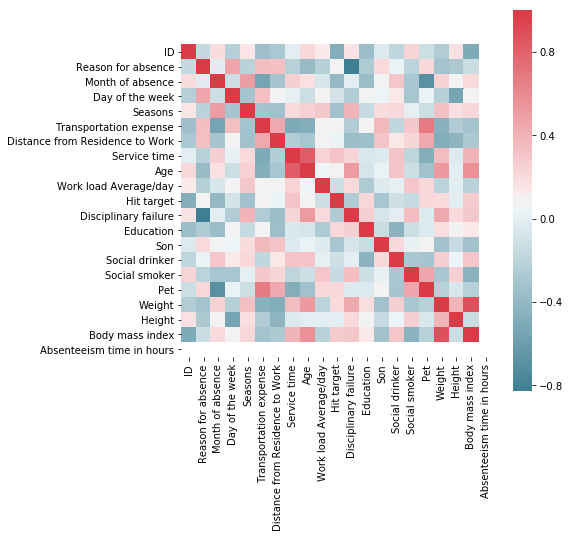

In [24]:
#Find the correlation for the non respondents
#Correlation function is defined below
correlation(non_respondent_analysis)

In [25]:
from sklearn.preprocessing import Imputer

In [26]:
#Store the orignal data in a temporary data frame
temp = absent

In [27]:
#KNN Imputation
from fancyimpute import KNN

### Applying KNN (Median) Imputation

In [28]:
#absent.isna().sum()

In [29]:
def imputation(column, data=absent):
    temp = data[column]
    d = np.array(data[column]).reshape(-1,1)
    
    #Default value of k is 5
    data[column] = KNN(k=5).fill(d, missing_mask = np.isnan(d), fill_method="median")
    
    #Data before imputation
    print("Data before imputation")
    X = temp.index
    y = temp
    plt.plot(X, y)
    
    #Data after imputation
    print("Data after imputation")
    y = data[column]
    plt.plot(X, y)

Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation
Data before imputation
Data after imputation


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

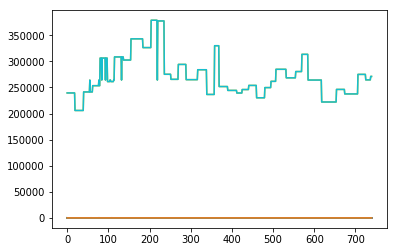

In [30]:
list(map(imputation, absent.columns))

In [31]:
absent.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [32]:
#Save the NA free data to a file. 
#This can be used later.
absent.to_csv("absent_NA_free.csv")

### Mapping Categories to Ordinal Data

In [33]:
social_drinker_dict = {"yes": 1, "no": 0}
education_dict = {"high school":1, "graduate":2,
                  "postgraduate":3, "master and doctor": 4
                 }
seasons_dict = {"summer":1, "autumn":2, "winter":3, "spring": 4}
day_of_week_dict = {"Monday":2, "Tuesday":3, "Wednesday":4, "Thursday":5,"Friday":6}
social_smoker_dict = {"yes":1, "no":0}
disciplinary_failure_dict = {"yes":1, "no":0}

In [34]:
#Set the target and independent variable
y = absent.loc[:, 'Absenteeism time in hours']
X = absent.loc[:, list(set(absent.columns) - set(['Absenteeism time in hours']))]

In [35]:
X

,Work load Average/day,Son,Seasons,Service time,Month of absence,Weight,Reason for absence,Disciplinary failure,Pet,Day of the week,Education,Hit target,Age,Height,ID,Distance from Residence to Work,Social smoker,Transportation expense,Social drinker,Body mass index
0,239554.0,2.0,1,13.0,7.0,90.0,26.0,0.0,1.0,3,1.0,97.0,33.0,172.0,11,36.0,0.0,289.0,1.0,30.0
1,239554.0,1.0,1,18.0,7.0,98.0,0.0,1.0,0.0,3,1.0,97.0,50.0,178.0,36,13.0,0.0,118.0,1.0,31.0
2,239554.0,0.0,1,18.0,7.0,89.0,23.0,0.0,0.0,4,1.0,97.0,38.0,170.0,3,51.0,0.0,179.0,1.0,31.0
3,239554.0,2.0,1,14.0,7.0,68.0,7.0,0.0,0.0,5,1.0,97.0,39.0,168.0,7,5.0,1.0,279.0,1.0,24.0
4,239554.0,2.0,1,13.0,7.0,90.0,23.0,0.0,1.0,5,1.0,97.0,33.0,172.0,11,36.0,0.0,289.0,1.0,30.0
5,239554.0,0.0,1,18.0,7.0,89.0,23.0,0.0,0.0,6,1.0,97.0,38.0,170.0,3,51.0,0.0,179.0,1.0,31.0
6,239554.0,1.0,1,3.0,7.0,80.0,22.0,0.0,4.0,6,1.0,97.0,28.0,172.0,10,52.0,0.0,225.0,1.0,27.0
7,239554.0,4.0,1,11.0,7.0,65.0,23.0,0.0,0.0,6,1.0,97.0,36.0,168.0,20,50.0,0.0,260.0,1.0,23.0
8,239554.0,2.0,1,14.0,7.0,95.0,19.0,0.0,0.0,2,1.0,97.0,34.0,196.0,14,12.0,0.0,155.0,1.0,25.0
9,239554.0,1.0,1,14.0,7.0,88.0,22.0,0.0,1.0,2,3.0,97.0,37.0,172.0,1,11.0,0.0,235.0,0.0,29.0


## Plotting Utility

In [36]:
def plotting(data, x, y, t="scatter"):
    if(t=="hist"):
        plt.hist(data[y])
        plt.xlabel(y)
        plt.ylabel("Frequency Count")
        return plt
    elif(t=="line"):
        if(x=="index"):
            plt.plot(data.index, data[y])
        else:
            plt.plot(data[x], data[y])
    else:
        if(x=="index"):
            plt.plot(data.index, data[y])
        else:
            plt.scatter(data[x], data[y])
    plt.title(x + " V/S " + y)
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

##  Reason for absence V/S Absenteeism

In [37]:
#Find the most frequent reason for Absenteeism
from collections import Counter
count_R_A = Counter(np.array(absent["Reason for absence"]).ravel())

In [38]:
count_R_A = dict(count_R_A)

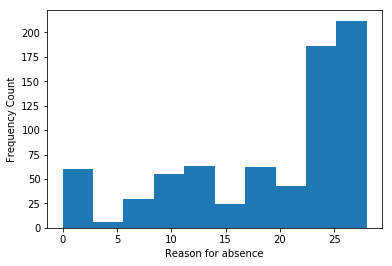

In [40]:
plt = plotting(absent, "", "Reason for absence", "hist")
plt.savefig("Reason of absence Histogram.png")

In [41]:
#Create a Data Frame for the Reason for Absence and its frequency
absence_reason_df = pd.DataFrame({"Reason":list(count_R_A.keys()), "Frequency": list(count_R_A.values())}, columns=["Reason", "Frequency"])


In [42]:
#Sort the data frame in descending order of Frequency
absence_reason_df = absence_reason_df.sort_values(by = "Frequency", ascending=False)
absence_reason_df

,Reason,Frequency
2,23.0,152
12,28.0,110
17,27.0,69
11,13.0,55
1,0.0,43
5,19.0,40
4,22.0,37
0,26.0,33
14,25.0,31
7,11.0,26


Most frequent reason:- medical consultation (23)
Least frequent reasons:- Neoplasms
                        Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism.

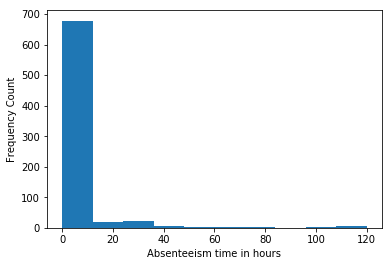

In [46]:
#Plot Reason for Absence V/S Absenteeism Hours
plt = plotting(absent, "", target, "hist")
plt.savefig('Reason of absence versus Absenteeism Hours.png')

In [ ]:
#Find Average hours of Absenteeism per Reason

## Season Wise Absenteeism

In [47]:
#seasons_dict
absent_summer, absent_autumn = absent[absent["Seasons"]==1], absent[absent["Seasons"]==2]
absent_winter, absent_spring = absent[absent["Seasons"]==3], absent[absent["Seasons"]==4]

In [48]:
#Calculate the mean hours of absenteeism per season
absent_summer_mean = np.mean(np.array(absent_summer[target]))
absent_winter_mean = np.mean(np.array(absent_winter[target]))
absent_autumn_mean = np.mean(np.array(absent_autumn[target]))
absent_spring_mean = np.mean(np.array(absent_spring[target])) 

In [49]:
l_seasons = [round(x,2) for x in [absent_summer_mean, absent_winter_mean, absent_autumn_mean, absent_spring_mean]]

In [50]:
print("Season wise Average Absenteeism\n")
print("Summer:-\tWinter:-\tAutumn:-\tSpring:-\n")

print("\t\t".join(str(ele) for ele in l_seasons))

Season wise Average Absenteeism

Summer:-	Winter:-	Autumn:-	Spring:-

7.19		8.13		5.95		6.28


In [51]:
#Calculate the aggregate mean per group
#mean_hours_per_season = absent_summer.aggregate('mean')

## Transportation Expense V/S Absenteeism Hours

## Analyze the ID wise Absent Trend

In [52]:
temp_X = X


In [53]:
temp_X_ID_wise = temp_X.set_index(["ID", "Month of absence", "Day of the week"])

In [54]:
temp_X_ID_wise.head()

,,,Work load Average/day,Son,Seasons,Service time,Weight,Reason for absence,Disciplinary failure,Pet,Education,Hit target,Age,Height,Distance from Residence to Work,Social smoker,Transportation expense,Social drinker,Body mass index
ID,Month of absence,Day of the week,,,,,,,,,,,,,,,,,
11,7.0,3,239554.0,2.0,1,13.0,90.0,26.0,0.0,1.0,1.0,97.0,33.0,172.0,36.0,0.0,289.0,1.0,30.0
36,7.0,3,239554.0,1.0,1,18.0,98.0,0.0,1.0,0.0,1.0,97.0,50.0,178.0,13.0,0.0,118.0,1.0,31.0
3,7.0,4,239554.0,0.0,1,18.0,89.0,23.0,0.0,0.0,1.0,97.0,38.0,170.0,51.0,0.0,179.0,1.0,31.0
7,7.0,5,239554.0,2.0,1,14.0,68.0,7.0,0.0,0.0,1.0,97.0,39.0,168.0,5.0,1.0,279.0,1.0,24.0
11,7.0,5,239554.0,2.0,1,13.0,90.0,23.0,0.0,1.0,1.0,97.0,33.0,172.0,36.0,0.0,289.0,1.0,30.0


In [55]:
temp_X_ID_wise_g = temp_X.groupby(["ID"])

In [56]:
temp_X_ID_wise_g.head()

,Work load Average/day,Son,Seasons,Service time,Month of absence,Weight,Reason for absence,Disciplinary failure,Pet,Day of the week,Education,Hit target,Age,Height,ID,Distance from Residence to Work,Social smoker,Transportation expense,Social drinker,Body mass index
0,239554.0,2.0,1,13.0,7.0,90.0,26.0,0.0,1.0,3,1.0,97.0,33.0,172.0,11,36.0,0.0,289.0,1.0,30.0
1,239554.0,1.0,1,18.0,7.0,98.0,0.0,1.0,0.0,3,1.0,97.0,50.0,178.0,36,13.0,0.0,118.0,1.0,31.0
2,239554.0,0.0,1,18.0,7.0,89.0,23.0,0.0,0.0,4,1.0,97.0,38.0,170.0,3,51.0,0.0,179.0,1.0,31.0
3,239554.0,2.0,1,14.0,7.0,68.0,7.0,0.0,0.0,5,1.0,97.0,39.0,168.0,7,5.0,1.0,279.0,1.0,24.0
4,239554.0,2.0,1,13.0,7.0,90.0,23.0,0.0,1.0,5,1.0,97.0,33.0,172.0,11,36.0,0.0,289.0,1.0,30.0
5,239554.0,0.0,1,18.0,7.0,89.0,23.0,0.0,0.0,6,1.0,97.0,38.0,170.0,3,51.0,0.0,179.0,1.0,31.0
6,239554.0,1.0,1,3.0,7.0,80.0,22.0,0.0,4.0,6,1.0,97.0,28.0,172.0,10,52.0,0.0,225.0,1.0,27.0
7,239554.0,4.0,1,11.0,7.0,65.0,23.0,0.0,0.0,6,1.0,97.0,36.0,168.0,20,50.0,0.0,260.0,1.0,23.0
8,239554.0,2.0,1,14.0,7.0,95.0,19.0,0.0,0.0,2,1.0,97.0,34.0,196.0,14,12.0,0.0,155.0,1.0,25.0
9,239554.0,1.0,1,14.0,7.0,88.0,22.0,0.0,1.0,2,3.0,97.0,37.0,172.0,1,11.0,0.0,235.0,0.0,29.0


## Analyze the Month wise Absent Trend

In [57]:
temp_X = X

In [58]:
temp_X_month_wise = temp_X.set_index(["Month of absence", "Day of the week", "ID"])

In [59]:
temp_X_month_wise.head(20)

Work load Average/day  Son  Seasons  \
Month of absence Day of the week ID                                        
7.0              3               11               239554.0  2.0        1   
                                 36               239554.0  1.0        1   
                 4               3                239554.0  0.0        1   
                 5               7                239554.0  2.0        1   
                                 11               239554.0  2.0        1   
                 6               3                239554.0  0.0        1   
                                 10               239554.0  1.0        1   
                                 20               239554.0  4.0        1   
                 2               14               239554.0  2.0        1   
                                 1                239554.0  1.0        1   
                                 20               239554.0  4.0        1   
                 3               20               239554.0  4.0        1   
                 4               20               239554.0  4.0        1   
                                 3                239554.0  0.0        1   
                                 3                239554.0  0.0        1   
                 6               24               239554.0  0.0        1   
                                 3                239554.0  0.0        1   
                 2               3                239554.0  0.0        1   
                 5               6                239554.0  2.0        1   
8.0              4               33               205917.0  2.0        1   

                                     Service time  Weight  Reason for absence  \
Month of absence Day of the week ID                                             
7.0              3               11          13.0    90.0                26.0   
                                 36          18.0    98.0                 0.0   
                 4               3           18.0    89.0                23.0   
                 5               7           14.0    68.0                 7.0   
                                 11          13.0    90.0                23.0   
                 6               3           18.0    89.0                23.0   
                                 10           3.0    80.0                22.0   
                                 20          11.0    65.0                23.0   
                 2               14          14.0    95.0                19.0   
                                 1           14.0    88.0                22.0   
                                 20          11.0    65.0                 1.0   
                 3               20          11.0    65.0                 1.0   
                 4               20          11.0    65.0                11.0   
                                 3           18.0    89.0                11.0   
                                 3           18.0    89.0                23.0   
                 6               24          16.0    67.0                14.0   
                                 3           18.0    89.0                23.0   
                 2               3           18.0    89.0                21.0   
                 5               6           13.0    69.0                11.0   
8.0              4               33          14.0    86.0                23.0   

                                     Disciplinary failure  Pet  Education  \
Month of absence Day of the week ID                                         
7.0              3               11                   0.0  1.0        1.0   
                                 36                   1.0  0.0        1.0   
                 4               3                    0.0  0.0        1.0   
                 5               7                    0.0  0.0        1.0   
                                 11                   0.0  1.0        1.0   
                 6               3        

In [60]:
temp_X_month_wise.tail(20)

Work load Average/day  Son  Seasons  \
Month of absence Day of the week ID                                        
6.0              2               34               275089.0  0.0        1   
                 5               12               275089.0  1.0        1   
                 6               34               275089.0  0.0        1   
                 4               34               275089.0  0.0        1   
                                 12               275089.0  1.0        1   
7.0              4               5                264604.0  1.0        1   
                 6               12               264604.0  1.0        1   
                 2               9                264604.0  2.0        1   
                                 34               264604.0  0.0        1   
                 3               9                264604.0  2.0        1   
                                 6                264604.0  2.0        1   
                 4               34               264604.0  0.0        1   
                                 10               264604.0  1.0        1   
                                 28               264604.0  1.0        1   
                 2               13               264604.0  3.0        1   
                 3               11               264604.0  2.0        1   
                                 1                264604.0  1.0        1   
0.0              3               4                271219.0  1.0        1   
                 4               8                271219.0  2.0        2   
                 6               35               271219.0  1.0        3   

                                     Service time  Weight  Reason for absence  \
Month of absence Day of the week ID                                             
6.0              2               34          10.0    83.0                25.0   
                 5               12           1.0    68.0                22.0   
                 6               34          10.0    83.0                 8.0   
                 4               34          10.0    83.0                10.0   
                                 12           1.0    68.0                22.0   
7.0              4               5           13.0   106.0                26.0   
                 6               12           1.0    68.0                19.0   
                 2               9           16.0    65.0                 6.0   
                                 34          10.0    83.0                28.0   
                 3               9           16.0    65.0                 6.0   
                                 6           13.0    69.0                22.0   
                 4               34          10.0    83.0                23.0   
                                 10           3.0    80.0                22.0   
                                 28           9.0    69.0                22.0   
                 2               13          12.0    70.0                13.0   
                 3               11          13.0    90.0                14.0   
                                 1           14.0    88.0                11.0   
0.0              3               4           13.0    98.0                 0.0   
                 4               8           14.0   100.0                 0.0   
                 6               35          14.0    77.0                 0.0   

                                     Disciplinary failure  Pet  Education  \
Month of absence Day of the week ID                                         
6.0              2               34                   0.0  0.0        1.0   
                 5               12                   0.0  8.0        2.0   
                 6               34                   0.0  0.0        1.0   
                 4               34                   0.0  0.0        1.0   
                                 12                   0.0  8.0        2.0   
7.0              4               5        

In [61]:
X.dtypes

Work load Average/day              float64
Son                                float64
Seasons                              int64
Service time                       float64
Month of absence                   float64
Weight                             float64
Reason for absence                 float64
Disciplinary failure               float64
Pet                                float64
Day of the week                      int64
Education                          float64
Hit target                         float64
Age                                float64
Height                             float64
ID                                   int64
Distance from Residence to Work    float64
Social smoker                      float64
Transportation expense             float64
Social drinker                     float64
Body mass index                    float64
dtype: object

In [64]:
#Store the target name in a variable
target = "Absenteeism time in hours"

## Distribution and Normality Check

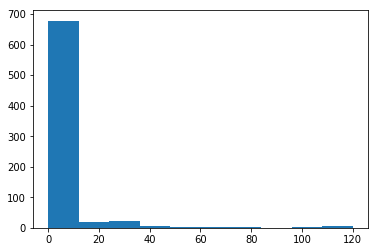

In [65]:
#Histogram
plt.hist(y)
plt.savefig("Distribution of Target.png")

In [66]:
#Q-Q PLot
import statsmodels.api as sm

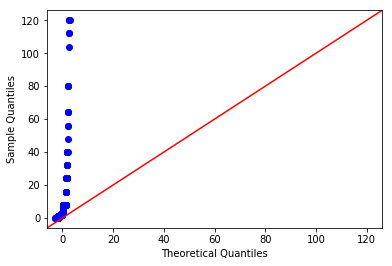

In [67]:
import pylab
sm.qqplot(y, line='45')
pylab.show()

In [68]:
#Apply log transformation on the target
y_log = np.log10(1+y)   #In case if any row has a value 0
targets = pd.DataFrame({"Absenteeism":y, "Absenteeism_log":y_log}, columns = ["Absenteeism", "Absenteeism_log"])
targets.head()

,Absenteeism,Absenteeism_log
0,4.0,0.698970
1,0.0,0.000000
2,2.0,0.477121
3,4.0,0.698970
4,2.0,0.477121


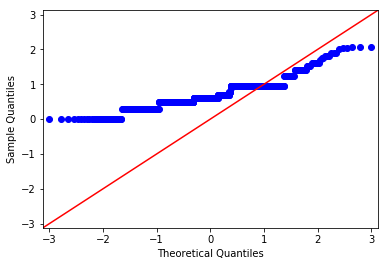

In [70]:
#Check the Q-Q plot of the transformed target
sm.qqplot(targets["Absenteeism_log"], line='45')
pylab.show()

In [71]:
targets["Absenteeism_log_base2"] = np.log2(1+y) - 2
targets.head()

,Absenteeism,Absenteeism_log,Absenteeism_log_base2
0,4.0,0.698970,0.321928
1,0.0,0.000000,-2.000000
2,2.0,0.477121,-0.415037
3,4.0,0.698970,0.321928
4,2.0,0.477121,-0.415037


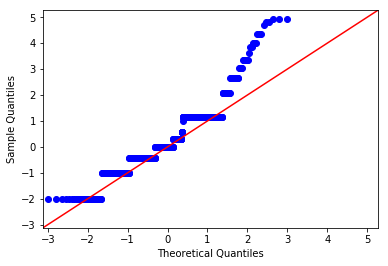

In [72]:
#Check the Q-Q plot of the transformed target
sm.qqplot(targets["Absenteeism_log_base2"], line='45')
pylab.show()

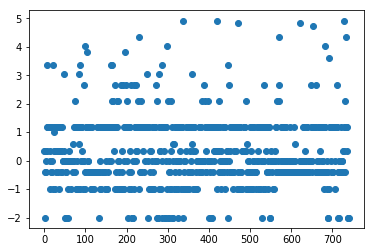

In [73]:
#Check the plot
plt.scatter(absent.index, targets["Absenteeism_log_base2"])
plt.savefig("Target Absenteeism Log.png")

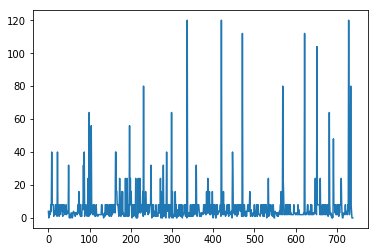

In [74]:
#Check the Absenteesm v/s the Index
plt.plot(absent.index, y)
plt.savefig("Target Trend.png")

In [75]:
# Count of each value in the target - "Absenteeism time in hours"
from collections import Counter
Counter(list(y))

Counter({4.0: 60,
         0.0: 36,
         2.0: 155,
         3.0: 132,
         8.0: 199,
         40.0: 7,
         1.0: 88,
         7.0: 1,
         32.0: 5,
         5.0: 7,
         16.0: 19,
         24.0: 16,
         64.0: 3,
         56.0: 2,
         80.0: 3,
         120.0: 3,
         112.0: 2,
         104.0: 1,
         48.0: 1})

## Outlier Analysis

In [76]:
def plotting(data, target):
    fig = plt.Figure(figsize=(7,7))
    plt.boxplot(data[target])

In [77]:
def outlier_analysis(data, target):
    #Plot the boxplot
    plotting(data, target)
    
    #Enter the quartile
    d = []
    d = input().split(' ')
    
    #Calculate lower and upper bounds
    q1, q3 = np.percentile(data[target], [int(d[0]), int(d[1])])
    IQR = q3-q1
    lower_bound, upper_bound = (q1-(1.5*IQR) , q3+(1.5*IQR))
    print("Maximum:- %.3f\nMinimum:- %.3f\n" %(upper_bound, lower_bound))
    
    lower, upper = (data.loc[data[target] < lower_bound, target], data.loc[data[target] > upper_bound, target])
    print("Lower:-{}".format(list(lower)))
    print("Upper:-{}".format(list(upper)))

25 75
Maximum:- 3.547
Minimum:- -2.792

Lower:-[]
Upper:-[4.022367813028454, 3.8328900141647413, 3.8328900141647413, 4.339850002884624, 4.022367813028454, 4.918863237274595, 4.918863237274595, 4.820178962415188, 4.339850002884624, 4.820178962415188, 4.714245517666122, 4.022367813028454, 3.6147098441152083, 4.918863237274595, 4.339850002884624]


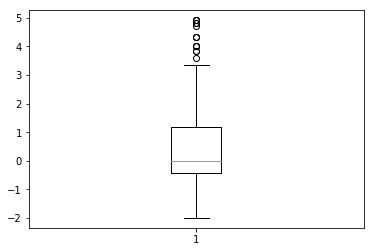

In [81]:
outlier_analysis(targets, "Absenteeism_log_base2")

In [82]:
#Mean of the target
#np.mean(absent["Absenteeism time in hours"])

np.mean(targets["Absenteeism_log_base2"])

0.2960288516498187

In [83]:
#print("Maximum Hours Absent:- {}\nMinimum Hours Absent:- {}" .format(np.max(absent["Absenteeism time in hours"]), np.min(absent["Absenteeism time in hours"])))
print("Maximum Hours Absent:- {}\nMinimum Hours Absent:- {}" .format(np.max(targets["Absenteeism_log_base2"]), np.min(targets["Absenteeism_log_base2"])))

Maximum Hours Absent:- 4.918863237274595
Minimum Hours Absent:- -2.0


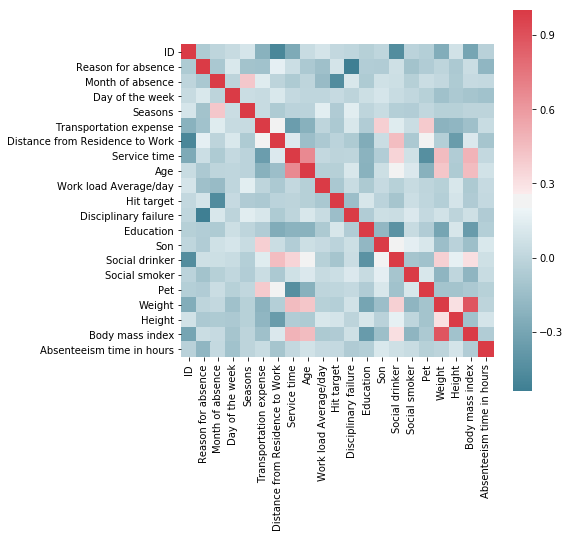

In [84]:
correlation(absent)

In [85]:
#Karl Pearson's Coefficient of Correaltion
def get_correlation_coefficient(x,y):
    #received two lists as input
    x_mean, y_mean = (sum(x)/len(x), sum(y)/len(y))
    x_sd = np.sqrt(sum([(x_i-x_mean)**2 for x_i in x])/len(x))
    y_sd = np.sqrt(sum([(y_i-y_mean)**2 for y_i in y])/len(y))
    
    return sum([(x_i-x_mean)*(y_i-y_mean) for x_i, y_i in zip(x, y)])/(len(x)*(x_sd*y_sd))

In [86]:
categorical_variables = ["Reason for absence", "Social drinker", "Social smoker", "Seasons", "Day of the week", "Disciplinary failure", "Education"]

In [87]:
len(categorical_variables)

7

### Analyze Month of absence V/S Hit target

In [88]:
X["Hit target"]

0      97.0
1      97.0
2      97.0
3      97.0
4      97.0
5      97.0
6      97.0
7      97.0
8      97.0
9      97.0
10     97.0
11     97.0
12     97.0
13     97.0
14     97.0
15     97.0
16     97.0
17     97.0
18     97.0
19     92.0
20     92.0
21     92.0
22     92.0
23     92.0
24     92.0
25     92.0
26     92.0
27     92.0
28     92.0
29     92.0
       ... 
710    96.0
711    96.0
712    96.0
713    96.0
714    96.0
715    96.0
716    96.0
717    96.0
718    96.0
719    96.0
720    96.0
721    96.0
722    96.0
723    96.0
724    96.0
725    93.0
726    93.0
727    93.0
728    93.0
729    93.0
730    93.0
731    93.0
732    93.0
733    93.0
734    93.0
735    93.0
736    93.0
737    95.0
738    95.0
739    95.0
Name: Hit target, Length: 740, dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'y_label'

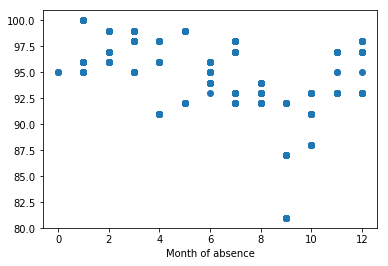

In [89]:
plt.scatter(X["Month of absence"], X["Hit target"])
plt.xlabel("Month of absence")
plt.y_label("Hit target")
plt.savefig("Month of absence V/S Hit target")

### Chi-Squared Test of Independence

In [90]:
from collections import defaultdict

In [91]:
categorical_variables = ["Reason for absence", "Social drinker", "Social smoker", "Seasons", "Day of the week", "Disciplinary failure", "Education"]

In [92]:
#Get the correlation between the categorical variables and perform the chi-squared test.
from scipy.stats import chi2_contingency
category_dict = defaultdict()
print("Category_1\t\tCategory_2\t\tChi_Square\t\tP-Value")

select = []    #Include the variables whose p-value < 0.05

for cat_1 in categorical_variables:
        category_dict[cat_1] = []
        for cat_2 in categorical_variables:
            res = get_correlation_coefficient(absent[cat_1].tolist(), absent[cat_2].tolist())
            category_dict[cat_1].append(res)
            if(cat_1!=cat_2):
                chi_value, p_value, dof, ex = chi2_contingency(
                                          pd.crosstab(absent[cat_1], absent[cat_2]))
                                          #Develop a Contingency table
                if(p_value<0.05):
                    if(cat_2 not in select):
                        select.append(cat_2)
                print("%s\t%s\t\t%.4f\t\t%.4f" %(cat_1,cat_2,chi_value, p_value))

Category_1		Category_2		Chi_Square		P-Value
Reason for absence	Social drinker		86.5335		0.0000
Reason for absence	Social smoker		93.8297		0.0000
Reason for absence	Seasons		267.9354		0.0000
Reason for absence	Day of the week		131.3106		0.0631
Reason for absence	Disciplinary failure		667.3330		0.0000
Reason for absence	Education		189.1442		0.0000
Social drinker	Reason for absence		86.5335		0.0000
Social drinker	Social smoker		6.9266		0.0085
Social drinker	Seasons		5.5355		0.1365
Social drinker	Day of the week		2.7203		0.6057
Social drinker	Disciplinary failure		1.2108		0.2712
Social drinker	Education		161.7074		0.0000
Social smoker	Reason for absence		93.8297		0.0000
Social smoker	Social drinker		6.9266		0.0085
Social smoker	Seasons		6.7584		0.0800
Social smoker	Day of the week		1.6061		0.8077
Social smoker	Disciplinary failure		8.6668		0.0032
Social smoker	Education		98.2601		0.0000
Seasons	Reason for absence		267.9354		0.0000
Seasons	Social drinker		5.5355		0.1365
Seasons	Social smoke

In [93]:
#Select the variables whose p-value is less than 0.05
select

['Social drinker',
 'Social smoker',
 'Seasons',
 'Disciplinary failure',
 'Education',
 'Reason for absence']

In [94]:
x,y = (list(range(2,10,2)), list(range(1,5)))

In [95]:
#Find the correlation of the target with each of the independent variables
corr_list = []
#Considering the continuous variables, ignoring the categorical variables.
for variable in list(set(X.columns)-set(categorical_variables)):
    #print(X[variable].tolist(), y.tolist())
    cor = get_correlation_coefficient(X[variable].tolist(), y)
    corr_list.append(cor)

In [96]:
corr_list

[0.0,
 -0.0005545760703958479,
 0.0004141205900926434,
 0.0,
 0.0,
 0.0005610740920201421,
 -0.003526731607975905,
 -0.0020056977057314423,
 -0.002469213749378929,
 -0.002244386033945293,
 0.00028133281291074395,
 -0.002582349707750457,
 -0.0013759882774615193]

## Analyzing Reason for Absence

In [97]:
#Reason for Absence and Absentee in hours
reason_absence =  absent[['Reason for absence', target]]

In [98]:
#Find the reason having the maximum absentee
reason_absence = reason_absence.sort_values(by=target, ascending=False)

In [99]:
reason_absence.loc[reason_absence['Reason for absence']== 0, :]

,Reason for absence,Absenteeism time in hours
337,0.0,120.0
551,0.0,3.0
405,0.0,3.0
64,0.0,3.0
50,0.0,3.0
55,0.0,3.0
313,0.0,3.0
215,0.0,3.0
446,0.0,0.0
336,0.0,0.0


In [100]:
#Find the most common reason for absence
count_absence_reason = Counter(absent["Reason for absence"])

In [101]:
#Create a data frame 
count_absence_reason = dict(count_absence_reason)
count_absence_reason

{26.0: 33,
 0.0: 43,
 23.0: 152,
 7.0: 15,
 22.0: 37,
 19.0: 40,
 1.0: 16,
 11.0: 26,
 14.0: 19,
 21.0: 6,
 10.0: 25,
 13.0: 55,
 28.0: 110,
 18.0: 21,
 25.0: 31,
 24.0: 3,
 6.0: 8,
 27.0: 69,
 17.0: 1,
 8.0: 6,
 12.0: 8,
 5.0: 3,
 9.0: 4,
 15.0: 2,
 4.0: 2,
 3.0: 1,
 2.0: 1,
 16.0: 3}

In [102]:
count_absence_reason = pd.DataFrame({"Category":list(count_absence_reason.keys()), "Count":list(count_absence_reason.values())}, columns=["Category", "Count"])

In [103]:
count_absence_reason = count_absence_reason.sort_values(by="Count", ascending=False)

In [104]:
count_absence_reason

,Category,Count
2,23.0,152
12,28.0,110
17,27.0,69
11,13.0,55
1,0.0,43
5,19.0,40
4,22.0,37
0,26.0,33
14,25.0,31
7,11.0,26


The most common reason for absence is reason 23: 
### medical consultation
The least common reason for absence is reason 2: 
### Neoplasms
and reason 3: 
### Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism

In [105]:
absent.loc[reason_absence[target]== 120.0, :]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
337,7,0.0,11.0,3,4,279.0,5.0,14.0,39.0,284031.0,...,1.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,120.0
420,36,13.0,4.0,4,3,118.0,13.0,18.0,50.0,239409.0,...,0.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,120.0
729,9,6.0,7.0,3,1,228.0,14.0,16.0,58.0,264604.0,...,0.0,1.0,2.0,0.0,0.0,1.0,65.0,172.0,22.0,120.0


In [106]:
##Employee who is absent without any reason
absent.iloc[337, :]

ID                                      7.0
Reason for absence                      0.0
Month of absence                       11.0
Day of the week                         3.0
Seasons                                 4.0
Transportation expense                279.0
Distance from Residence to Work         5.0
Service time                           14.0
Age                                    39.0
Work load Average/day              284031.0
Hit target                             97.0
Disciplinary failure                    1.0
Education                               1.0
Son                                     2.0
Social drinker                          1.0
Social smoker                           1.0
Pet                                     0.0
Weight                                 68.0
Height                                168.0
Body mass index                        24.0
Absenteeism time in hours             120.0
Name: 337, dtype: float64

In [107]:
month_absence = absent[[]]

### Correlation between various variables

Text(0,0.5,'Absenteeism time in hours')

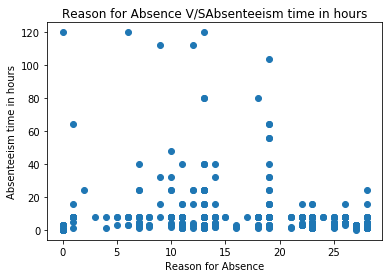

In [108]:
plt.scatter(absent['Reason for absence'], absent[target])
plt.title('Reason for Absence V/S' + target)
plt.xlabel('Reason for Absence')
plt.ylabel(target)

FileNotFoundError: [Errno 2] No such file or directory: 'Service Time V/S Transportation Expenses.png'

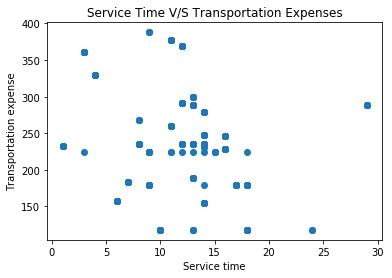

In [109]:
#Service Time V/S Transportation Expenses
#-0.368853
plt.scatter(absent['Service time'], absent['Transportation expense'])
plt.xlabel('Service time')
plt.ylabel('Transportation expense')
plt.title('Service Time V/S Transportation Expenses')
plt.savefig("Service Time V/S Transportation Expenses.png")

FileNotFoundError: [Errno 2] No such file or directory: 'Service Time V/S Age.png'

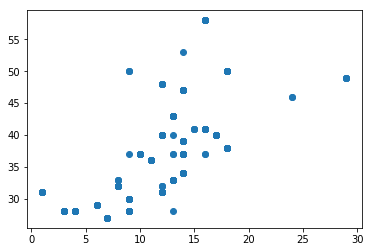

In [110]:
#Service Time V/S Age
#0.657972
plt.scatter(absent['Service time'], absent['Age'])
plt.savefig("Service Time V/S Age.png")

In [111]:
#correlation between service time and Age

#np.correlate(absent['Service time'], absent['Age'])

In [112]:
#Find the correlation between Disciplinary failure and Reason for absence
np.correlate(np.array(absent['Disciplinary failure']), np.array(absent['Reason for absence']))

array([0.])

In [113]:
absent.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.063543,0.002104,0.034468,0.098495,-0.223723,-0.484599,-0.269140,0.041770,0.092523,...,0.003468,-0.036254,0.007180,-0.451760,-0.010826,-0.039825,-0.252522,0.075548,-0.298518,-0.021570
Reason for absence,-0.063543,1.000000,-0.082673,0.115009,-0.117351,-0.118576,0.160590,0.050831,-0.077279,-0.131928,...,-0.538084,-0.046784,-0.056810,0.064536,-0.115428,-0.054877,0.001044,-0.079433,0.046162,-0.190931
Month of absence,0.002104,-0.082673,1.000000,-0.008845,0.406020,0.137458,-0.005027,-0.065753,0.001370,-0.164753,...,0.104983,-0.065495,0.070058,0.058638,-0.038190,0.048204,0.018041,-0.069042,0.029563,0.021263
Day of the week,0.034468,0.115009,-0.008845,1.000000,0.046493,0.033746,0.116193,0.021673,0.007129,0.006887,...,-0.007151,0.058516,0.097852,0.041951,0.013156,-0.029663,-0.127198,-0.080014,-0.103269,-0.118143
Seasons,0.098495,-0.117351,0.406020,0.046493,1.000000,0.037598,-0.065210,-0.010204,-0.013718,0.150320,...,0.145668,-0.002951,0.038974,-0.042425,-0.048671,0.013780,-0.027612,-0.033140,-0.005268,-0.004611
Transportation expense,-0.223723,-0.118576,0.137458,0.033746,0.037598,1.000000,0.256591,-0.347613,-0.227299,0.000411,...,0.108454,-0.051480,0.378563,0.139292,0.045647,0.394313,-0.209360,-0.195509,-0.131710,0.043075
Distance from Residence to Work,-0.484599,0.160590,-0.005027,0.116193,-0.065210,0.256591,1.000000,0.128385,-0.146132,-0.078240,...,-0.065935,-0.260536,0.047436,0.449801,-0.075865,0.206603,-0.045356,-0.354498,0.117482,-0.102026
Service time,-0.269140,0.050831,-0.065753,0.021673,-0.010204,-0.347613,0.128385,1.000000,0.668488,0.015119,...,0.001195,-0.214529,-0.050526,0.352812,0.071623,-0.440817,0.453442,-0.054606,0.494623,0.018172
Age,0.041770,-0.077279,0.001370,0.007129,-0.013718,-0.227299,-0.146132,0.668488,1.000000,-0.034887,...,0.106120,-0.222374,0.058165,0.211529,0.121900,-0.228949,0.416474,-0.063965,0.458658,0.077811
Work load Average/day,0.092523,-0.131928,-0.164753,0.006887,0.150320,0.000411,-0.078240,0.015119,-0.034887,1.000000,...,0.040285,-0.071173,0.031467,-0.031273,0.034099,-0.001920,-0.029578,0.108057,-0.071431,0.027802


In [114]:
absent.loc[absent["Disciplinary failure"]==1, ["Disciplinary failure", 'Reason for absence', 'Absenteeism time in hours']]
#31 Rows

,Disciplinary failure,Reason for absence,Absenteeism time in hours
1,1.0,0.0,0.0
51,1.0,0.0,0.0
54,1.0,0.0,0.0
55,1.0,0.0,3.0
58,1.0,0.0,0.0
64,1.0,0.0,3.0
203,1.0,0.0,0.0
213,1.0,0.0,0.0
214,1.0,0.0,0.0
215,1.0,0.0,3.0


In [115]:
absent.loc[absent["Disciplinary failure"]==0, ["Disciplinary failure", 'Reason for absence', 'Absenteeism time in hours']]
#608 Rows

,Disciplinary failure,Reason for absence,Absenteeism time in hours
0,0.0,26.0,4.0
2,0.0,23.0,2.0
3,0.0,7.0,4.0
4,0.0,23.0,2.0
5,0.0,23.0,3.0
6,0.0,22.0,8.0
7,0.0,23.0,4.0
8,0.0,19.0,40.0
9,0.0,22.0,8.0
10,0.0,1.0,8.0
